# Ford GoBike
## by Hassan Ibrahim

## Investigation Overview

> In this analysis, I want to look into the characteristics of the riders to see how can we increase the number of riders.

## Dataset Overview

> The data consists of information regarding 1,538,086 bike ride from Jun 2017 until July 2018. It contains some data that desribes the rider  (date of birth, gender, and type) and others describing the ride (duration, bike ID, time, station..)
Data can be found on Gobike website https://www.fordgobike.com/system-data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_pickle('Ford_GoBike.pkl')

## Gender Distribution
> It is clear that most of the bike riders are males with more than 1 million ride.

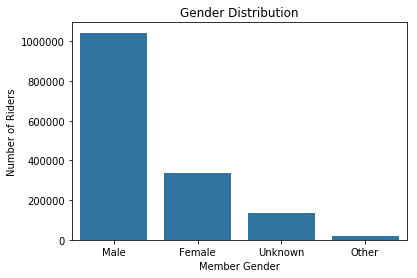

In [32]:
clr=sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=clr)
plt.title('Gender Distribution')
plt.xlabel('Member Gender')
plt.ylabel('Number of Riders');

## Rider's Age Distribution
> The highest number of the bike riders are within the age 30-35, and its start decreasing after this age gradually.

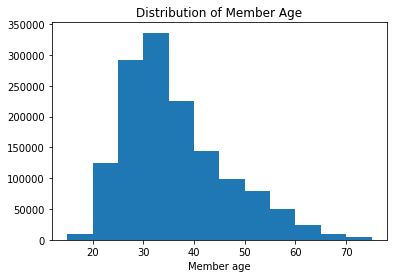

In [36]:
bin_edges = np.arange(15, 75+5, 5)
plt.hist(data = df, x = 'member_age', bins=bin_edges)
plt.xlabel('Member age')
plt.title('Distribution of Member Age');

## User Type vs Day of Week

> The rides that done by the subscribers are higher than the customers with highest number of rides on Tuesday. However the subscriber rides during the weekdays are much more higher than the subsriber rides during the weekend, but we can see oppsite results for customer rides.

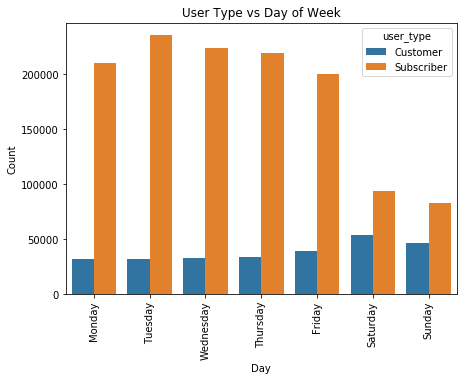

In [31]:
df['start_day_of_week']=df['start_time'].dt.weekday
plt.figure(figsize=(7,5))
sb.countplot(data = df, x = 'start_day_of_week', hue = 'user_type');
ticks1 = [0, 1, 2, 3, 4, 5, 6]
labels1 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks1, labels1, rotation=90)
plt.title('User Type vs Day of Week')
plt.xlabel('Day')
plt.ylabel('Count');

## Duration by Gender and User Type

> Plotting a FacetGrid and Duration(min) on a logarithmic scale make it easier to conclude that the customers tend to have higher duration rides than the subscribers regardless the gender type.


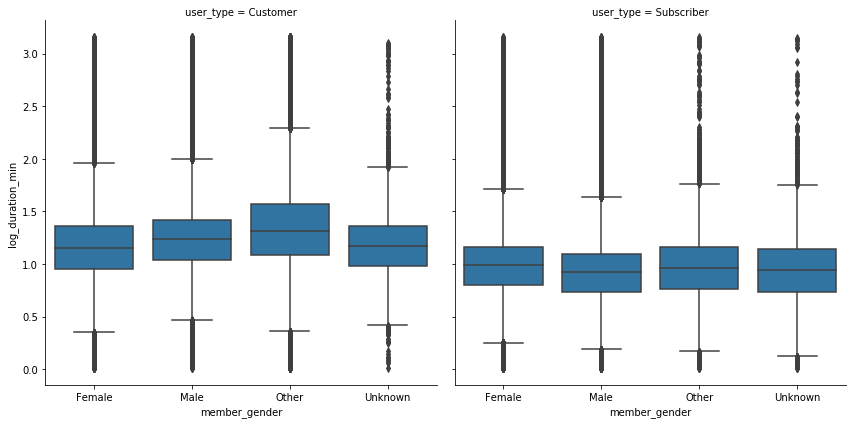

In [25]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 6)
g.map(sb.boxplot, 'member_gender', 'log_duration_min');
